#  CS251: Data Analysis and Visualization

## 3D Rotation matrices

Spring 2021

Oliver W. Layton and Stephanie Taylor

This notebook is designed to demonstrate 3D rotation with a completed transformation.py. It will not run without one.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

In [13]:
import data
import analysis
import transformation

First, we define two plotting functions.

In [14]:
def plot_these_pairs( data, pairs ):
    """Plot each of the given pairs of features
       There is a row if len(pairs) subplots with pair[0] on the x-axis and pair[1] on the y-axis.
       data is a Data object.
       pairs is a list of pairs of headers, e.g.
          [['X,'Y'],['Y',Z']]
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(pairs), figsize=(12,4));

    for i in range(len(pairs)):
        pair = pairs[i]
        mat = data.select_data( pair )
        axes[i].plot( mat[:,0], mat[:,1], 'o' )
        axes[i].axhline(color='k')
        axes[i].axvline(color='k')
        axes[i].set_xlim( [-2,2] )
        axes[i].set_ylim( [-2,2] )
        xl = axes[i].get_xlim()
        axes[i].text( xl[1], 0, pair[0])
        yl = axes[i].get_ylim()
        axes[i].text( 0, yl[1], pair[1])

    plt.tight_layout();
    plt.show()



In [15]:
def scatter3d(data, headers, xlim, ylim, zlim, better_view=False ):
    '''Creates a 3D scatter plot to visualize data
    the x, y, and z axes are drawn, but not ticks
    data is a Data object
    headers in the list of headers to plot
    xlim, ylim, and zlim should be tuples indicating the limits of each axis
    if better_view is true, then the image is constructed so that the Y axis points up
    '''
    if len(headers) != 3:
        print( "need 3 headers to make a 3d scatter plot")
        return
    xyz = data.select_data(headers)
    
    if better_view:
        # by default, matplot lib puts the 3rd axis heading up
        # and the second axis heading back.
        # rotate it so that the second axis is up and the third is forward
        R = np.eye(3)
        R[1,1] = np.cos( np.pi/2 )
        R[1,2] = -np.sin( np.pi/2 )
        R[2,1] = np.sin( np.pi/2 )
        R[2,2] = np.cos( np.pi/2 )
        xyz = (R @ xyz.T).T

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # Scatter plot of data in 3D
    ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2])
    ax.plot( xlim, [0,0], [0,0], 'k' )
    ax.plot( [0,0], ylim, [0,0], 'k' )
    ax.plot( [0,0], [0,0], zlim, 'k' )
    ax.text( xlim[1], 0, 0, 'X')
    if better_view:
        ax.text( 0, zlim[0], 0, 'Z')
        ax.text( 0, 0, ylim[1], 'Y')
    else:
        ax.text( 0, ylim[1], 0, 'Y')
        ax.text( 0, 0, zlim[1], 'Z')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    plt.show()



### Points Clustered Along X-Axis

Now, we define a Data object with 3D data that are clustered along the positive X-axis.

Then we plot them with both a 3D scatter plot and a set of 2D scatter plots, pairing up each pair of dimensions.

[[ 1.40707 -0.15407 -0.05174]
 [ 1.98285 -0.04883  0.08535]
 [ 0.9684   0.049   -0.21251]
 [ 0.78683 -0.05593  0.07162]
 [ 1.20454  0.03732 -0.02549]
 [-0.21691  0.07483 -0.01631]
 [ 2.90012  0.10912  0.0926 ]
 [ 2.5384   0.00042  0.19741]
 [ 0.31004 -0.15857  0.00464]
 [ 2.36062  0.01214 -0.14136]
 [-0.0825  -0.05032 -0.04947]
 [ 0.23196 -0.08495 -0.17194]
 [ 0.29116  0.06797 -0.10655]
 [-0.24262 -0.17664 -0.04924]
 [ 0.91296 -0.10393  0.00894]
 [ 1.01988  0.08538 -0.00174]
 [ 1.51278 -0.18777 -0.02571]
 [ 1.5377   0.05197 -0.28344]
 [ 0.82328 -0.09232 -0.02985]
 [ 0.32804  0.11961 -0.05532]
 [ 2.49909  0.02396  0.08156]
 [ 1.89181 -0.09759 -0.20336]
 [ 2.08408  0.0342  -0.14902]
 [ 0.8065   0.0779   0.13816]
 [ 1.68228 -0.11662  0.14629]
 [-0.12895 -0.18025  0.0839 ]
 [ 2.38564 -0.0171   0.04096]
 [-0.12759  0.11105  0.02066]
 [ 1.82384  0.00705  0.08547]
 [ 2.3681   0.03328  0.04909]
 [ 2.76963  0.16031  0.00311]
 [-0.04148 -0.06226  0.11736]
 [ 1.64933 -0.08711 -0.02741]
 [-0.40101

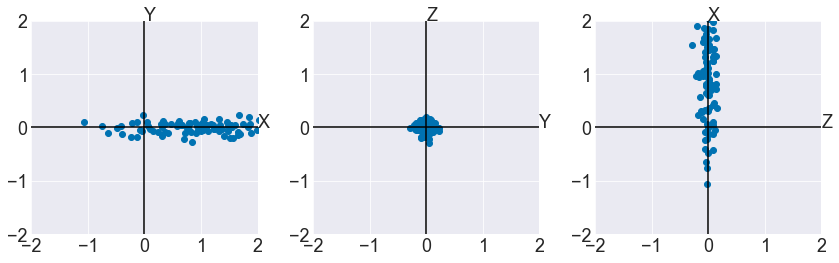

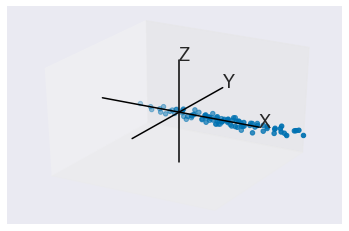

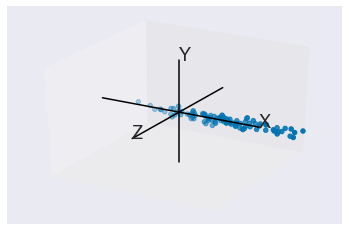

In [16]:
N = 100
dxmat = np.zeros( (N,3) )
dxmat[:,0] = 1 + np.random.randn(N)
dxmat[:,1] = 0.1*np.random.randn(N)
dxmat[:,2] = 0.1*np.random.randn(N)

print(dxmat)
# Make a Data object that names the headers X, Y, and Z
dobj = data.Data( data=dxmat, headers=['X','Y','Z'], header2col={'X':0,'Y':1,'Z':2} )
# Make a Transformation object with that Data Object
tobj = transformation.Transformation(dobj)
# Project features X, Y, Z
tobj.project( ['X','Y','Z'])
# make a list of the pairs x-y, y-z, z-x
pairs = [['X','Y'],['Y','Z'],['Z','X']]
# plot those pairs
plot_these_pairs( tobj.data, pairs )
# do a 3d scatter plot using -2,2 as range for each axis
scatter3d(tobj.data,['X','Y','Z'],(-2,2),(-2,2),(-2,2))
# do a 3d scatter plot using -2,2 as range for each axis
scatter3d(tobj.data,['X','Y','Z'],(-2,2),(-2,2),(-2,2), better_view=True)

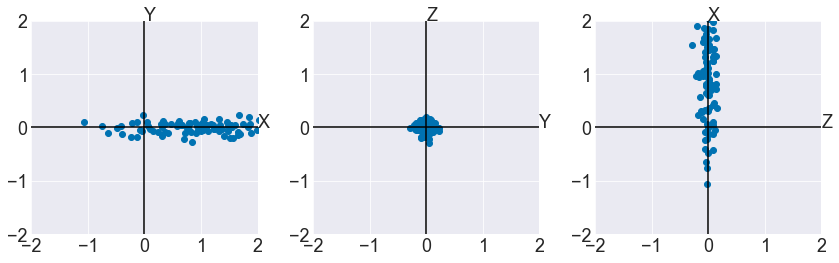

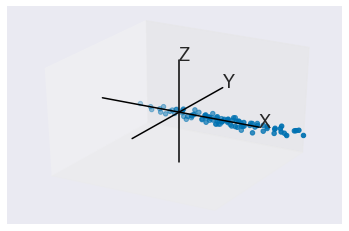

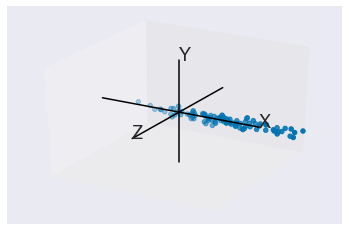

In [17]:
# Use the Translation object to rotate the Data 90 degrees around the Z axis
# re-plot those pairs.
tobj.rotate_3d( header="Z", degrees=90)
# plot those pairs
plot_these_pairs( tobj.data, pairs )
# do a 3d scatter plot using -2,2 as range for each axis
scatter3d(tobj.data,['X','Y','Z'],(-2,2),(-2,2),(-2,2))
# do a 3d scatter plot using -2,2 as range for each axis
scatter3d(tobj.data,['X','Y','Z'],(-2,2),(-2,2),(-2,2), better_view=True)

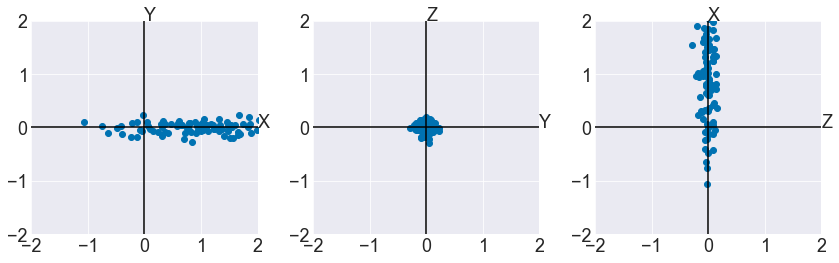

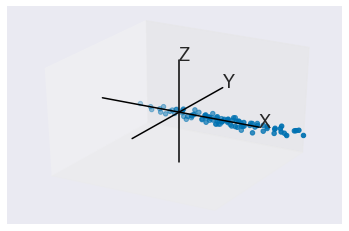

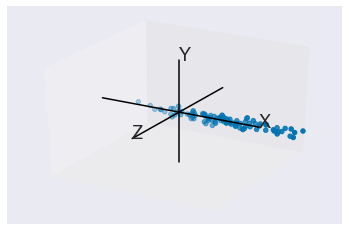

In [18]:
# Use the Translation object to rotate the Data 90 degrees around the X axis
# re-plot those pairs.
tobj.rotate_3d("X",90)
# do a 3d scatter plot using -2,2 as range for each axist.rotate_3d('Z', 90)
# plot those pairs
plot_these_pairs( tobj.data, pairs )
# do a 3d scatter plot using -2,2 as range for each axis
scatter3d(tobj.data,['X','Y','Z'],(-2,2),(-2,2),(-2,2))
# do a 3d scatter plot using -2,2 as range for each axis
scatter3d(tobj.data,['X','Y','Z'],(-2,2),(-2,2),(-2,2), better_view=True)

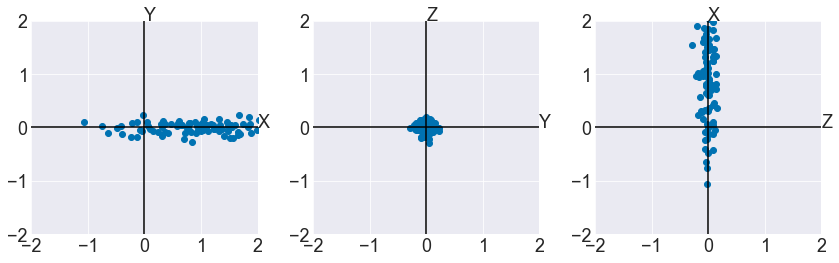

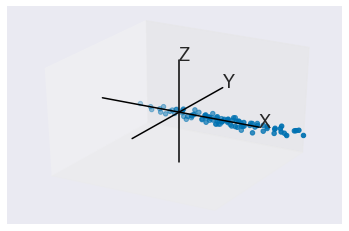

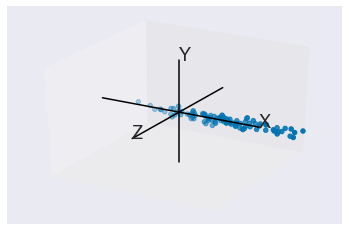

In [19]:
# Use the Translation object to rotate the Data 90 degrees around the Y axis
# re-plot those pairs.
# do a 3d scatter plot using -2,2 as range for each axist.rotate_3d('Z', 90)
tobj.rotate_3d("Y",90)
# do a 3d scatter plot using -2,2 as range for each axist.rotate_3d('Z', 90)
# plot those pairs
plot_these_pairs( tobj.data, pairs )
# do a 3d scatter plot using -2,2 as range for each axis
scatter3d(tobj.data,['X','Y','Z'],(-2,2),(-2,2),(-2,2))
# do a 3d scatter plot using -2,2 as range for each axis
scatter3d(tobj.data,['X','Y','Z'],(-2,2),(-2,2),(-2,2), better_view=True)

### 3D Rotation of "Robot" data

Let's practice the workflow from the project to make a pair plot of the 3 variable (X, Y, Z) robot dataset.

In [21]:
# Load in data/robotData.csv
rdobj = data.Data( 'data/robotData.csv')
# Create a transformation object with that Data object
rtobj = transformation.Transformation( rdobj )
print(rdobj)

-------------------
data/robotData.csv (3000x3) 
Headers: 
X    Y    Z
--------------------------
Showing first 5/3000 rows.
 -5.0 -10.0  -5.0
 -5.0 -10.0  -4.0
 -5.0 -10.0  -3.0
 -5.0 -10.0  -2.0
 -5.0 -10.0  -1.0
--------------------------



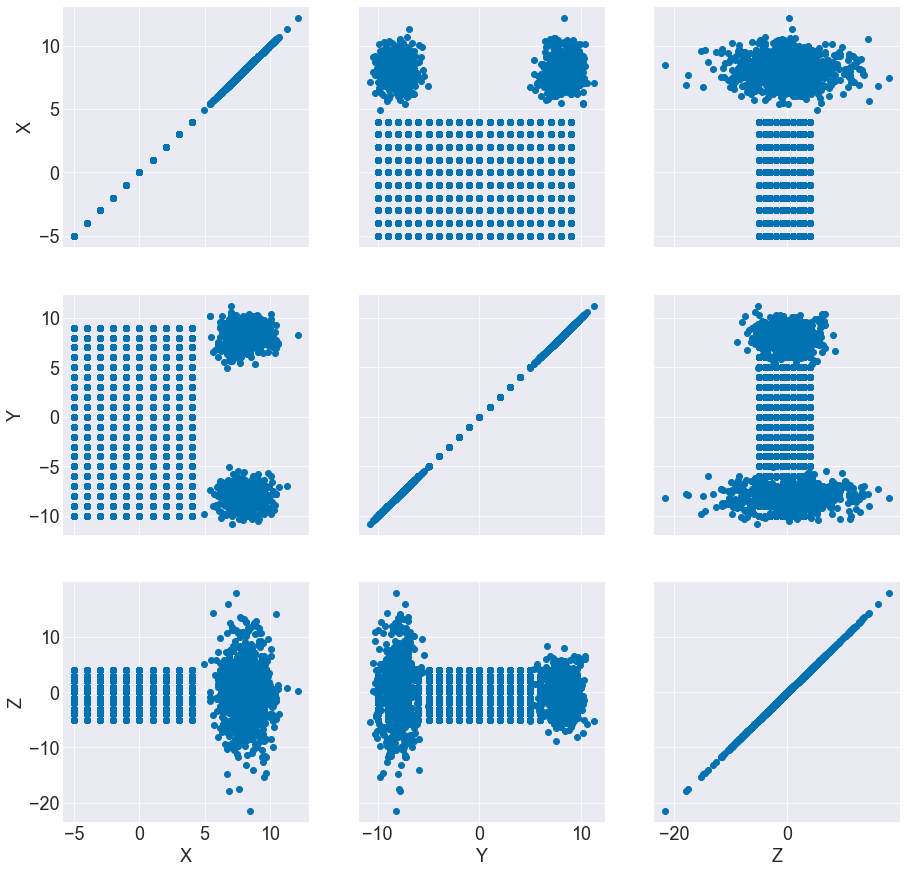

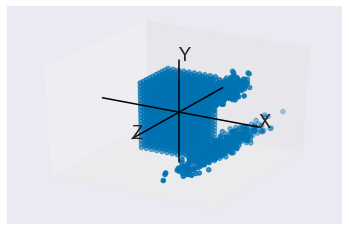

In [22]:
# Project features X, Y, Z
rtobj.project( ["X","Y","Z"])
# pair-plot features x, y, z
rtobj.pair_plot(["X","Y","Z"] )
# do a 3d scatter plot using -2,2 as range for each axis
scatter3d(rtobj.data,['X','Y','Z'],(-15,15),(-15,15),(-15,15), better_view=True)

#### a) Rotate data so (X, Y) view shows the "upright robot face".

In other words, looking at the robot face head-on.

Let's use the project 3D scatterplot tool to help us figure out the correct rotation axis and angle to get the job done. 

Remember the right-hand rule:
- **Positive (+)** rotation means the data will move in the direction of our curled fingers when we align our right-hand thumb with the positive (+) axis we wish to rotate about.

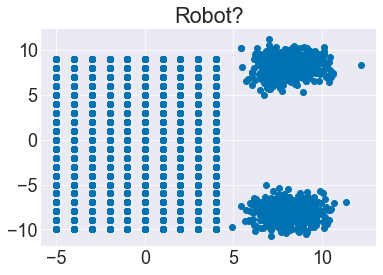

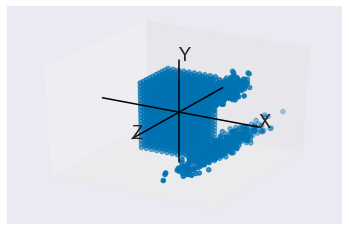

In [23]:
rtobj.project( ["X","Y","Z"])
rtobj.rotate_3d( "Z", 90)
rtobj.scatter( "X","Y", "Robot?")
scatter3d(rtobj.data,['X','Y','Z'],(-15,15),(-15,15),(-15,15), better_view=True)

#### b) Rotate data so (X, Y) view shows the (Y, Z) view from the pair plot.

In other words, we see the elongated blob on the left, the sphere on the right (i.e. looking at robot face from bird-eye view).

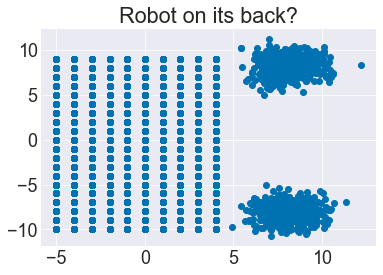

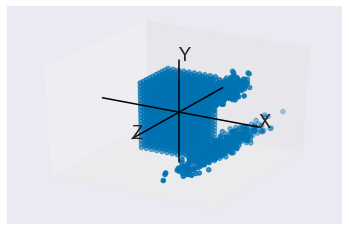

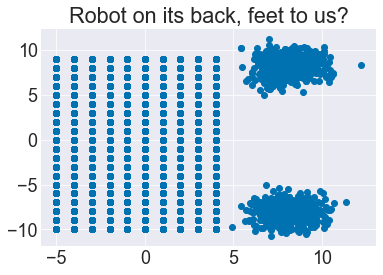

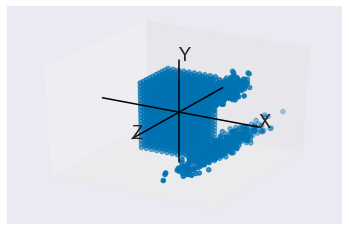

In [24]:
# project again (this clears out the previously transformed data)
rtobj.project( ["X","Y","Z"])

rtobj.rotate_3d( "X", -90)
rtobj.scatter( "X","Y", "Robot on its back?")
scatter3d(rtobj.data,['X','Y','Z'],(-15,15),(-15,15),(-15,15), better_view=True)

rtobj.rotate_3d( "Y", -90)
rtobj.scatter( "X","Y", "Robot on its back, feet to us?")
scatter3d(rtobj.data,['X','Y','Z'],(-15,15),(-15,15),(-15,15), better_view=True)

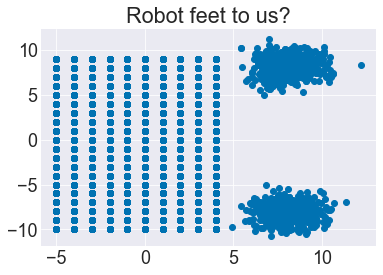

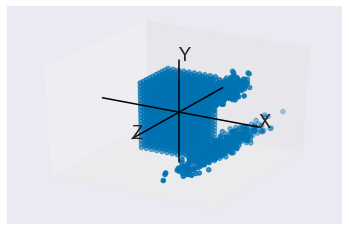

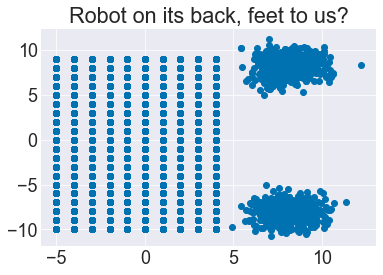

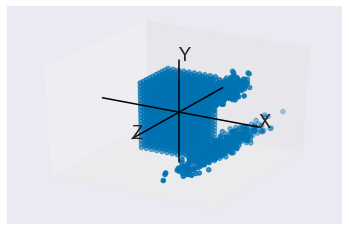

In [29]:
# project again (this clears out the previously transformed data)
rtobj.project( ["X","Y","Z"])

rtobj.rotate_3d( "Y", -90)
rtobj.scatter( "X","Y", "Robot feet to us?")
scatter3d(rtobj.data,['X','Y','Z'],(-15,15),(-15,15),(-15,15), better_view=True)

rtobj.rotate_3d( "Z", -90)
rtobj.scatter( "X","Y", "Robot on its back, feet to us?")
scatter3d(rtobj.data,['X','Y','Z'],(-15,15),(-15,15),(-15,15), better_view=True)

#### c) Rotate data so (X, Y) view shows the (Z, Y) view from the pair plot.

In other words, we see the elongated blob on the left, the sphere on the right (i.e. looking at robot face from bird-eye view).

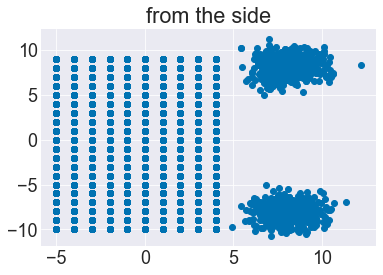

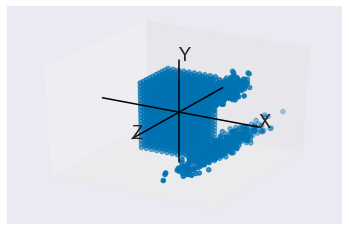

In [28]:
# project again (this clears out the previously transformed data)
# Do the rotations
# scatter plotblockTransform.project(['X', 'Y', 'Z'])
# project again (this clears out the previously transformed data)
rtobj.project( ["X","Y","Z"])

rtobj.rotate_3d( "Y", 90)
rtobj.scatter( "X","Y", "from the side")
scatter3d(rtobj.data,['X','Y','Z'],(-15,15),(-15,15),(-15,15), better_view=True)